Comparison of simulationed XYZ and transformed XYZ using Sovdat2019 matrix eq8 and eq 9


In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np

current_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
from src import *
sys.path.append(os.path.join(current_dir,'..','params'))
from load_params import *


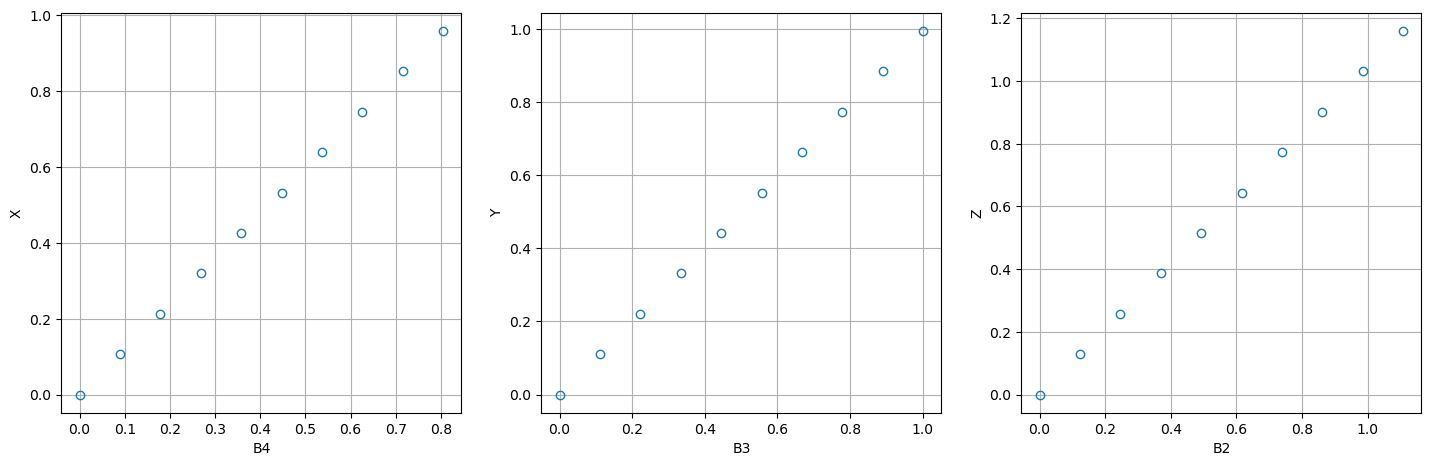

In [6]:
# simple test,
s2_bnames = ['B4','B3','B2']
v = np.linspace(0,1,10)
A = np.tile(v,(3,1)).T
for i in range(3):
    A[:,i] *= ds_d65_s2a[s2_bnames[i]]/100

B =  np.matmul(A,matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8)
# print('Transformation Matrix')
# print(matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8)

X = [A[:,i] for i in range(3)]
Y = [B[:,i] for i in range(3)]

xlabels = ['B4','B3','B2']
ylabels = ['X','Y','Z']
fmts = ['o','o','o']
solid_markers = [False]*len(X)
grid = [True]*len(X)
# xlims = [(-0.05,1.1)]*len(X)
xlims = None
ylims = xlims
plot_figures(X, Y, xlabels=xlabels,ylabels=ylabels,titles=None, ncol=3, cell_width=4,cell_height=4,
                 left_margin=0.5,right_margin=0.5,top_margin=0.5,bottom_margin=0.5,
                 h_margin=0.8,v_margin=0.5,fmts=fmts,grid=grid,solid_markers=solid_markers, 
                 legends=None,dstfile=None,xlims=xlims,ylims=ylims)


Rho to XYZ


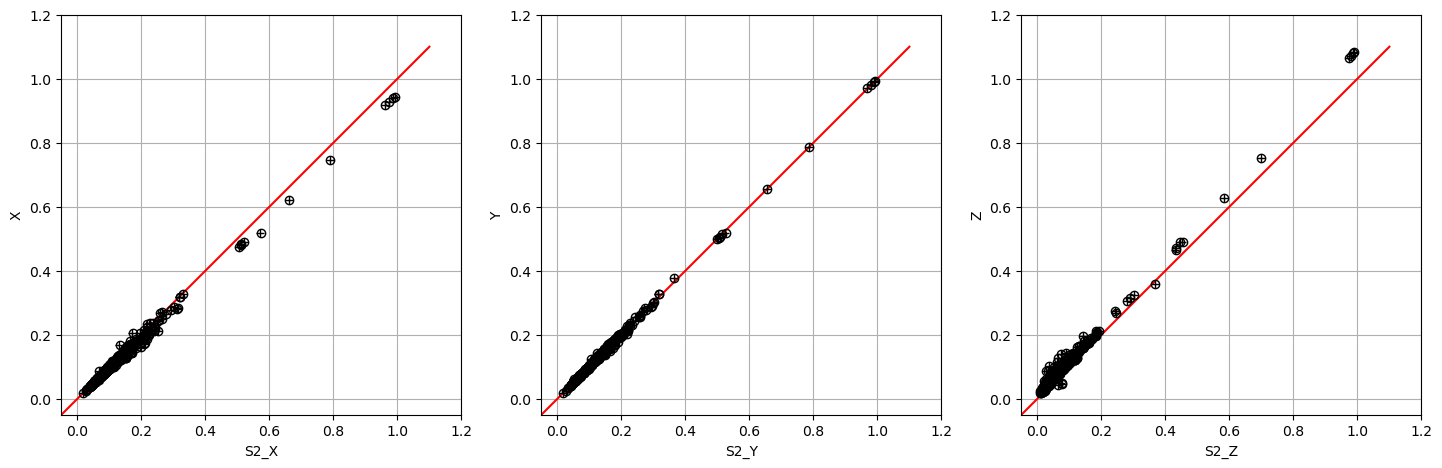

rad to XYZ


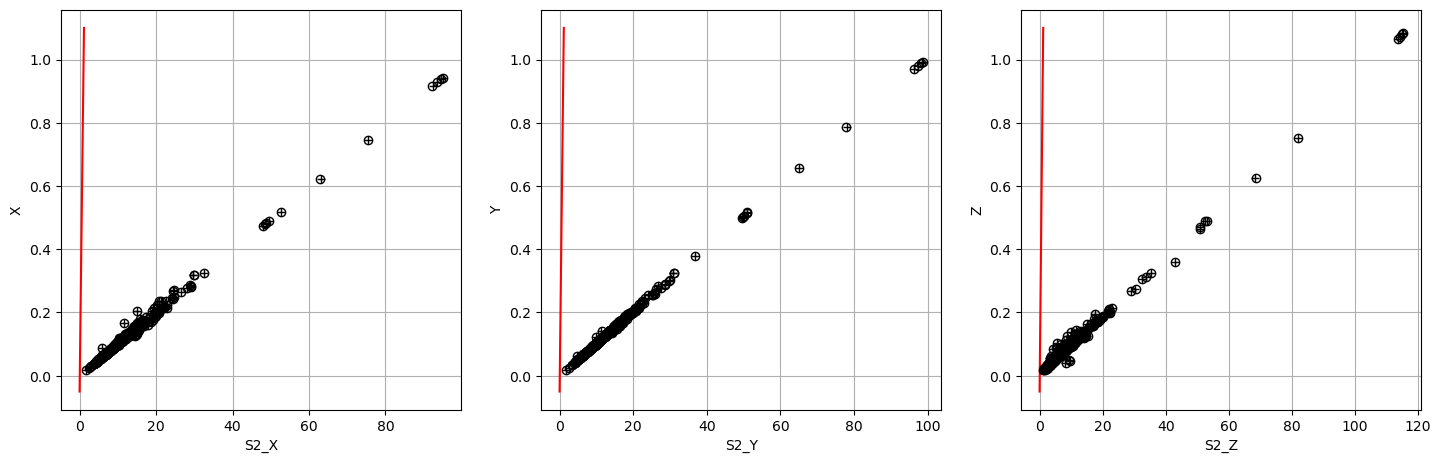

In [9]:
# Ecostress simulation eval
ds_xyz = read_csv(os.path.join(current_dir,'..','Simulation','xyz_ECOSTRESS.csv'))
ds_rho_s2a = read_csv(os.path.join(current_dir,'..','Simulation','rho_ECOSTRESS_S2A.csv'))
ds_rho_s2b = read_csv(os.path.join(current_dir,'..','Simulation','rho_ECOSTRESS_S2B.csv'))
ds_rho_s2 = [ds_rho_s2a,ds_rho_s2b]
ds_rad_s2a = read_csv(os.path.join(current_dir,'..','Simulation','rad_ECOSTRESS_S2A.csv'))
ds_rad_s2b = read_csv(os.path.join(current_dir,'..','Simulation','rad_ECOSTRESS_S2B.csv'))
ds_rad_s2 = [ds_rad_s2a,ds_rad_s2b]
s2_bnames = ['B4','B3','B2']
xyz_names = ['X','Y','Z']
sensor_names = ['S2A','S2B']

def s2_to_xyz(ds_s2,matrix):
    s2_bnames = ['B4','B3','B2']
    A = np.empty([len(ds_s2['B4']),3],dtype=float)
    for i in range(len(s2_bnames)):
            A[:,i] = ds_s2[s2_bnames[i]]
    B = A @ matrix
    
    return B

print('Eq8')
matrix = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8
print('Rho to XYZ')
xyz_s2 = []
for s in range(2):
    xyz = s2_to_xyz(ds_rho_s2[s],matrix)
    xyz_s2.append(xyz)

X = []
Y = []
for i in range(3):
    xs = []
    ys = []
    xs.append([-0.05,1.1])
    ys.append([-0.05,1.1])
    for s in range(2):
        x = list(xyz_s2[s][:,i])
        y = ds_xyz[xyz_names[i]]
        xs.append(x)
        ys.append(y)
    X.append(xs)
    Y.append(ys)

xlabels = ['S2_X','S2_Y','S2_Z']
ylabels = ['X','Y','Z']

fmts = [['r-','ko','k+']]*len(s2_bnames)
solid_markers = [[False,False,False]]*len(X)
grid = [True]*len(X)
xlims = [(-0.05,1.2)]*len(X)
# xlims = None
ylims = xlims
plot_figures(X, Y, xlabels=xlabels, ylabels=ylabels, titles=None, ncol=3, cell_width=4, cell_height=4,
                 left_margin=0.5, right_margin=0.5, top_margin=0.5, bottom_margin=0.5,
                 h_margin=0.8, v_margin=0.5, fmts=fmts, grid=grid, solid_markers=solid_markers, 
                 legends=None, dstfile=None,xlims=xlims,ylims=ylims)


print('rad to XYZ')

xyz_s2 = []
for s in range(2):
    xyz = s2_to_xyz(ds_rad_s2[s],matrix)
    xyz_s2.append(xyz)

X = []
Y = []
for i in range(3):
    xs = []
    ys = []
    xs.append([-0.05,1.1])
    ys.append([-0.05,1.1])
    for s in range(2):
        x = list(xyz_s2[s][:,i])
        y = ds_xyz[xyz_names[i]]
        xs.append(x)
        ys.append(y)
        
    X.append(xs)
    Y.append(ys)

xlabels = ['S2_X','S2_Y','S2_Z']
ylabels = ['X','Y','Z']

fmts = [['r-','ko','k+']]*len(s2_bnames)
solid_markers = [[False,False,False]]*len(X)
grid = [True]*len(X)
xlims = [(-0.05,1.2)]*len(X)
xlims = None
ylims = xlims
plot_figures(X, Y, xlabels=xlabels, ylabels=ylabels, titles=None, ncol=3, cell_width=4, cell_height=4,
                 left_margin=0.5, right_margin=0.5, top_margin=0.5, bottom_margin=0.5,
                 h_margin=0.8, v_margin=0.5, fmts=fmts, grid=grid, solid_markers=solid_markers, 
                 legends=None, dstfile=None,xlims=xlims,ylims=ylims)


Eq9
Rho to XYZ


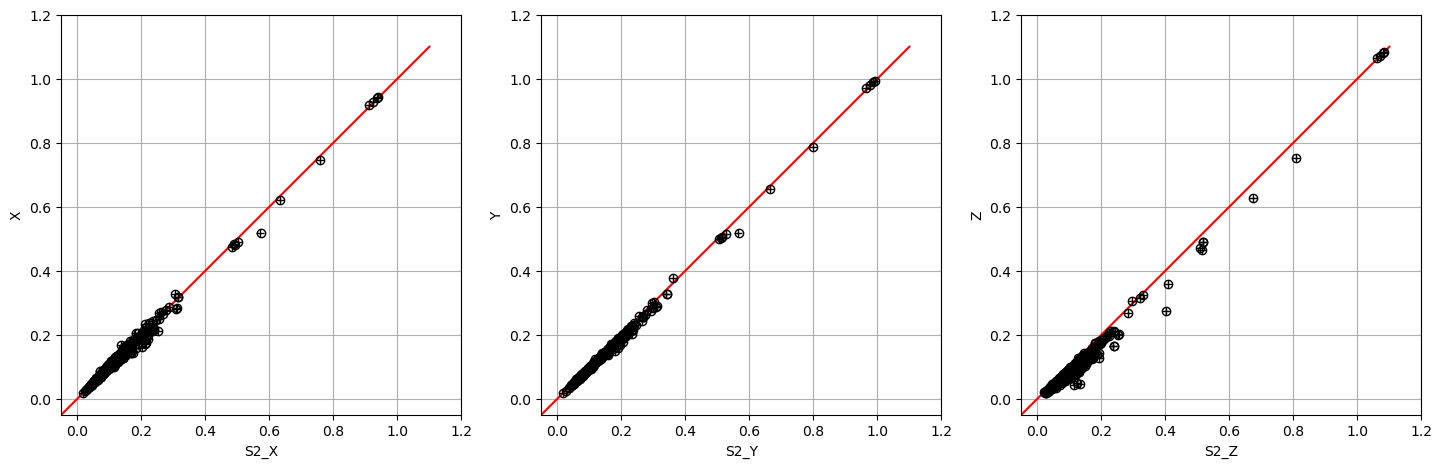

rad to XYZ


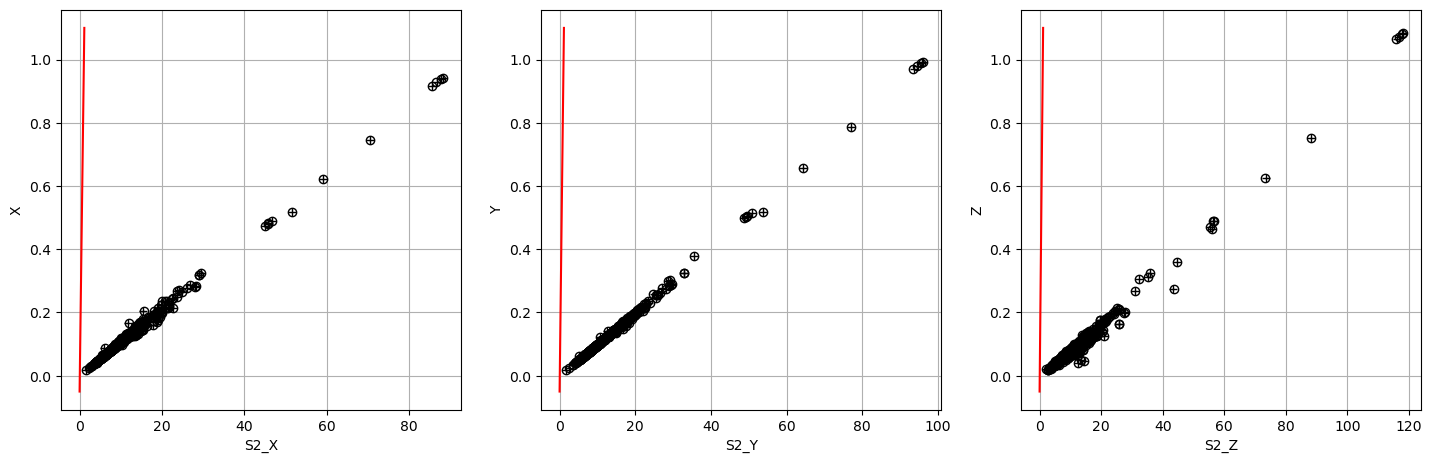

In [10]:
print('Eq9')
matrix = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq9
print('Rho to XYZ')
xyz_s2 = []
for s in range(2):
    xyz = s2_to_xyz(ds_rho_s2[s],matrix)
    xyz_s2.append(xyz)

X = []
Y = []
for i in range(3):
    xs = []
    ys = []
    xs.append([-0.05,1.1])
    ys.append([-0.05,1.1])
    for s in range(2):
        x = list(xyz_s2[s][:,i])
        y = ds_xyz[xyz_names[i]]
        xs.append(x)
        ys.append(y)
    X.append(xs)
    Y.append(ys)

xlabels = ['S2_X','S2_Y','S2_Z']
ylabels = ['X','Y','Z']

fmts = [['r-','ko','k+']]*len(s2_bnames)
solid_markers = [[False,False,False]]*len(X)
grid = [True]*len(X)
xlims = [(-0.05,1.2)]*len(X)
# xlims = None
ylims = xlims
plot_figures(X, Y, xlabels=xlabels, ylabels=ylabels, titles=None, ncol=3, cell_width=4, cell_height=4,
                 left_margin=0.5, right_margin=0.5, top_margin=0.5, bottom_margin=0.5,
                 h_margin=0.8, v_margin=0.5, fmts=fmts, grid=grid, solid_markers=solid_markers, 
                 legends=None, dstfile=None,xlims=xlims,ylims=ylims)


print('rad to XYZ')

xyz_s2 = []
for s in range(2):
    xyz = s2_to_xyz(ds_rad_s2[s],matrix)
    xyz_s2.append(xyz)

X = []
Y = []
for i in range(3):
    xs = []
    ys = []
    xs.append([-0.05,1.1])
    ys.append([-0.05,1.1])
    for s in range(2):
        x = list(xyz_s2[s][:,i])
        y = ds_xyz[xyz_names[i]]
        xs.append(x)
        ys.append(y)
        
    X.append(xs)
    Y.append(ys)

xlabels = ['S2_X','S2_Y','S2_Z']
ylabels = ['X','Y','Z']

fmts = [['r-','ko','k+']]*len(s2_bnames)
solid_markers = [[False,False,False]]*len(X)
grid = [True]*len(X)
xlims = [(-0.05,1.2)]*len(X)
xlims = None
ylims = xlims
plot_figures(X, Y, xlabels=xlabels, ylabels=ylabels, titles=None, ncol=3, cell_width=4, cell_height=4,
                 left_margin=0.5, right_margin=0.5, top_margin=0.5, bottom_margin=0.5,
                 h_margin=0.8, v_margin=0.5, fmts=fmts, grid=grid, solid_markers=solid_markers, 
                 legends=None, dstfile=None,xlims=xlims,ylims=ylims)